In [1]:
import pandas as pd
import os

In [2]:
path='Dataset'
os.listdir(path)

['output.csv', 'output.zip']

In [3]:
for i in os.listdir(path):
    if i is None:
        print("This File Cannot be Found")
    else:
        df=pd.read_csv(os.path.join(path,i))

In [4]:
df.head(n=3)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive


In [5]:
df.shape

(39999, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 0 to 39998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     39999 non-null  object
 1   sentiment  39999 non-null  object
dtypes: object(2)
memory usage: 625.1+ KB


In [7]:
df.describe()

,review,sentiment
count,39999,39999
unique,39733,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,20006


In [8]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [9]:
boolean = df.duplicated().any() 
boolean

True

In [10]:
df.drop_duplicates(keep=False, inplace=True)

In [11]:
df.describe()

,review,sentiment
count,39476,39476
unique,39476,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,19851


In [12]:
print(len(df['review'].unique()),df['sentiment'].count())

39476 39476


In [13]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [14]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply preprocessing to the dataset
df['preprocessed_review'] = df['review'].apply(preprocess_text)

In [15]:
print(df['review'][1],"\n\n\n",df['preprocessed_review'][1])

A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done. 


In [16]:
a=df['preprocessed_review'].tolist()
a

['one reviewer mentioned watching oz episode youll hooked right exactly happened mebr br first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordbr br called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home manyaryans muslim gangsta latino christian italian irish moreso scuffle death stare dodgy dealing shady agreement never far awaybr br would say main appeal show due fact go show wouldnt dare forget pretty picture painted mainstream audience forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard wholl sold nickel inmate wholl kill order get away well mannered middle class inmate turned 

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Feature extraction
def extract_features(corpus):
    vectorizer = TfidfVectorizer()

    # Fit the vectorizer to the corpus and transform the corpus
    features = vectorizer.fit_transform(corpus)

    return features

corpus = df['preprocessed_review'].tolist()
features = extract_features(corpus)
print("Shape of features:", features.shape)

Shape of features: (39476, 144202)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
X = features
y = df['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Train a logistic regression model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.895516717325228


In [19]:
import matplotlib.pyplot as plt

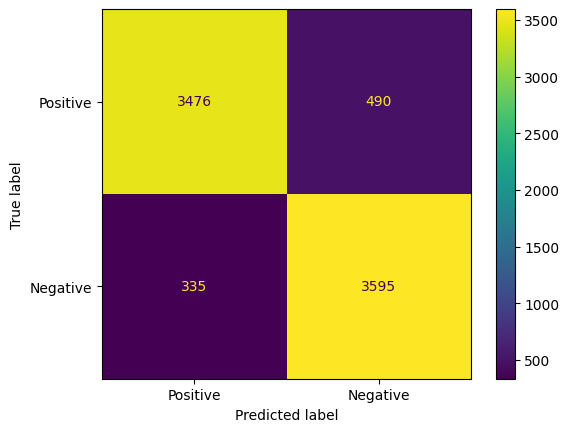

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(cm,display_labels=["Positive","Negative"])
disp.plot()
plt.show()

In [21]:
#this is a test file 'test.csv' from kaggle 

In [22]:
my_test_file = pd.read_csv('test.csv')
my_test_file 

,text
0,This movie was horrible. If it had never been ...
1,The director infuses this film with false dept...
2,"I don't get it! The teenage leads in ""Horror S..."
3,"This is the fifth part of 'The Animatrix', a c..."
4,I was very impressed with with this film which...
...,...
10996,In the wake of my personal research into the p...
10997,I had a bit of hope for this hour long film ma...
10998,Having been pleasantly surprised by Sandra Bul...
10999,"Elfriede Jelinek, not quite a household name y..."


In [23]:
def preprocess_text2(text):
    if isinstance(text, float):  # Check if the value is float (NaN)
        return ''
    
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply preprocessing to the test dataset
my_test_file['preprocessed_text'] = my_test_file['text'].apply(preprocess_text2)
my_test_file['preprocessed_text'] 

0        movie horrible never made world would better p...
1        director infuses film false depth repeating gi...
2        dont get teenage lead horror star supposedly d...
3        fifth part animatrix collection animated short...
4        impressed film directed luigi bazzoni story yo...
                               ...                        
10996    wake personal research pending end cycle time ...
10997    bit hope hour long film made footage old pover...
10998    pleasantly surprised sandra bullock performanc...
10999    elfriede jelinek quite household name yet winn...
11000    there something rotten film basically way turn...
Name: preprocessed_text, Length: 11001, dtype: object

In [24]:
# Extract the preprocessed reviews from the test dataset
my_test_corpus = my_test_file['preprocessed_text'].tolist()

In [25]:
# Create a new vectorizer object and fit it with the training data vocabulary
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)

TfidfVectorizer()

In [26]:
# Transform the test data using the fitted vectorizer
my_test_features = vectorizer.transform(my_test_corpus)

In [27]:
# Predict the labels for the test data
my_test_predictions = model.predict(my_test_features)
my_test_predictions

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [28]:
my_test_file

,text,preprocessed_text
0,This movie was horrible. If it had never been ...,movie horrible never made world would better p...
1,The director infuses this film with false dept...,director infuses film false depth repeating gi...
2,"I don't get it! The teenage leads in ""Horror S...",dont get teenage lead horror star supposedly d...
3,"This is the fifth part of 'The Animatrix', a c...",fifth part animatrix collection animated short...
4,I was very impressed with with this film which...,impressed film directed luigi bazzoni story yo...
...,...,...
10996,In the wake of my personal research into the p...,wake personal research pending end cycle time ...
10997,I had a bit of hope for this hour long film ma...,bit hope hour long film made footage old pover...
10998,Having been pleasantly surprised by Sandra Bul...,pleasantly surprised sandra bullock performanc...
10999,"Elfriede Jelinek, not quite a household name y...",elfriede jelinek quite household name yet winn...


In [29]:
# Save the predictions to a file ALso the file didn't have the sentiment labels associated 
output_file = 'test_predictions.csv'
my_test_file['predicted_sentiment'] = my_test_predictions
my_test_file.to_csv(output_file, index=False)
print("Predictions saved to:", output_file)

Predictions saved to: test_predictions.csv
